In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv('cancer.csv')

In [14]:
pd.set_option('display.max_columns',None)
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


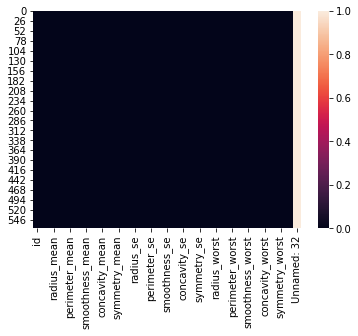

In [6]:
sns.heatmap(cancer.isnull())

In [4]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
cancer.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
X = cancer.iloc[:,2:]
y = cancer.iloc[:,1]

In [12]:
y

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [15]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


cancer.info()

In [16]:
cancer.loc[(cancer.diagnosis == 'M')]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [17]:
M = cancer.loc[(cancer.diagnosis == 'M')].iloc[:,2:]
B = cancer.loc[(cancer.diagnosis == 'B')].iloc[:,2:]

In [18]:
B.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


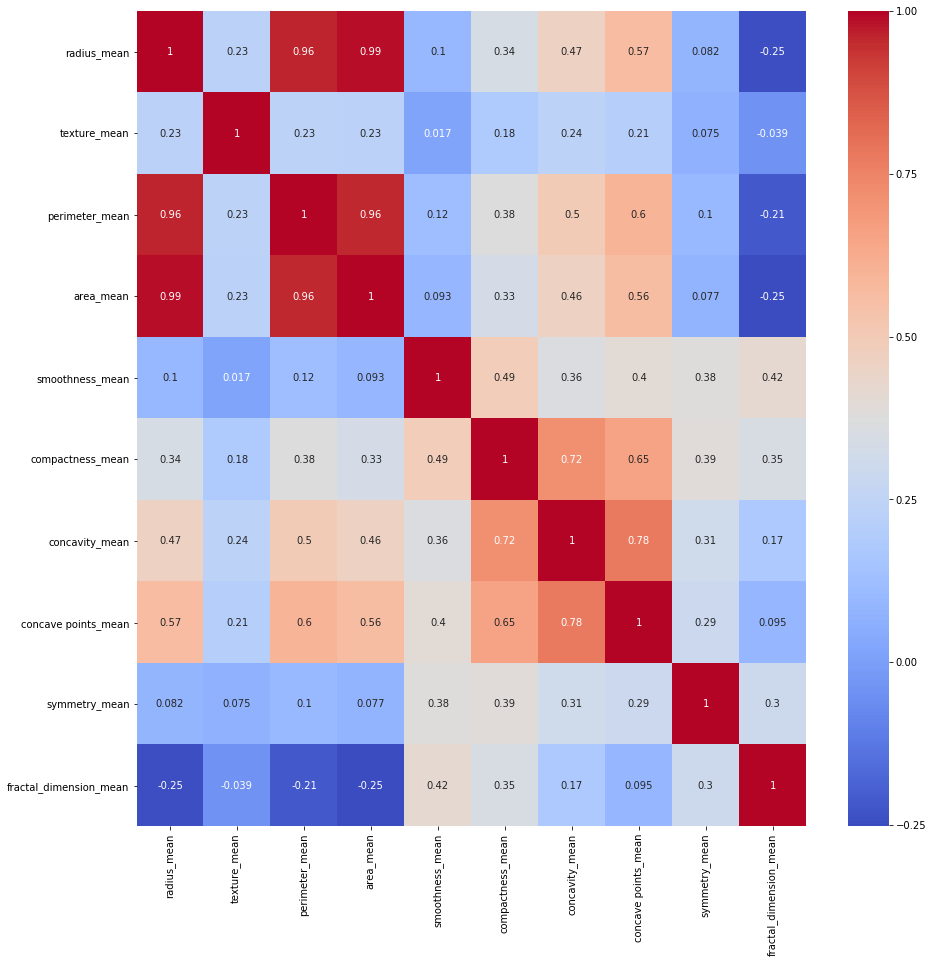

In [19]:
#cancer.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cancer.iloc[:,1:12].corr(method='kendall'), cmap='coolwarm',annot=True)

<Figure size 1080x1080 with 0 Axes>

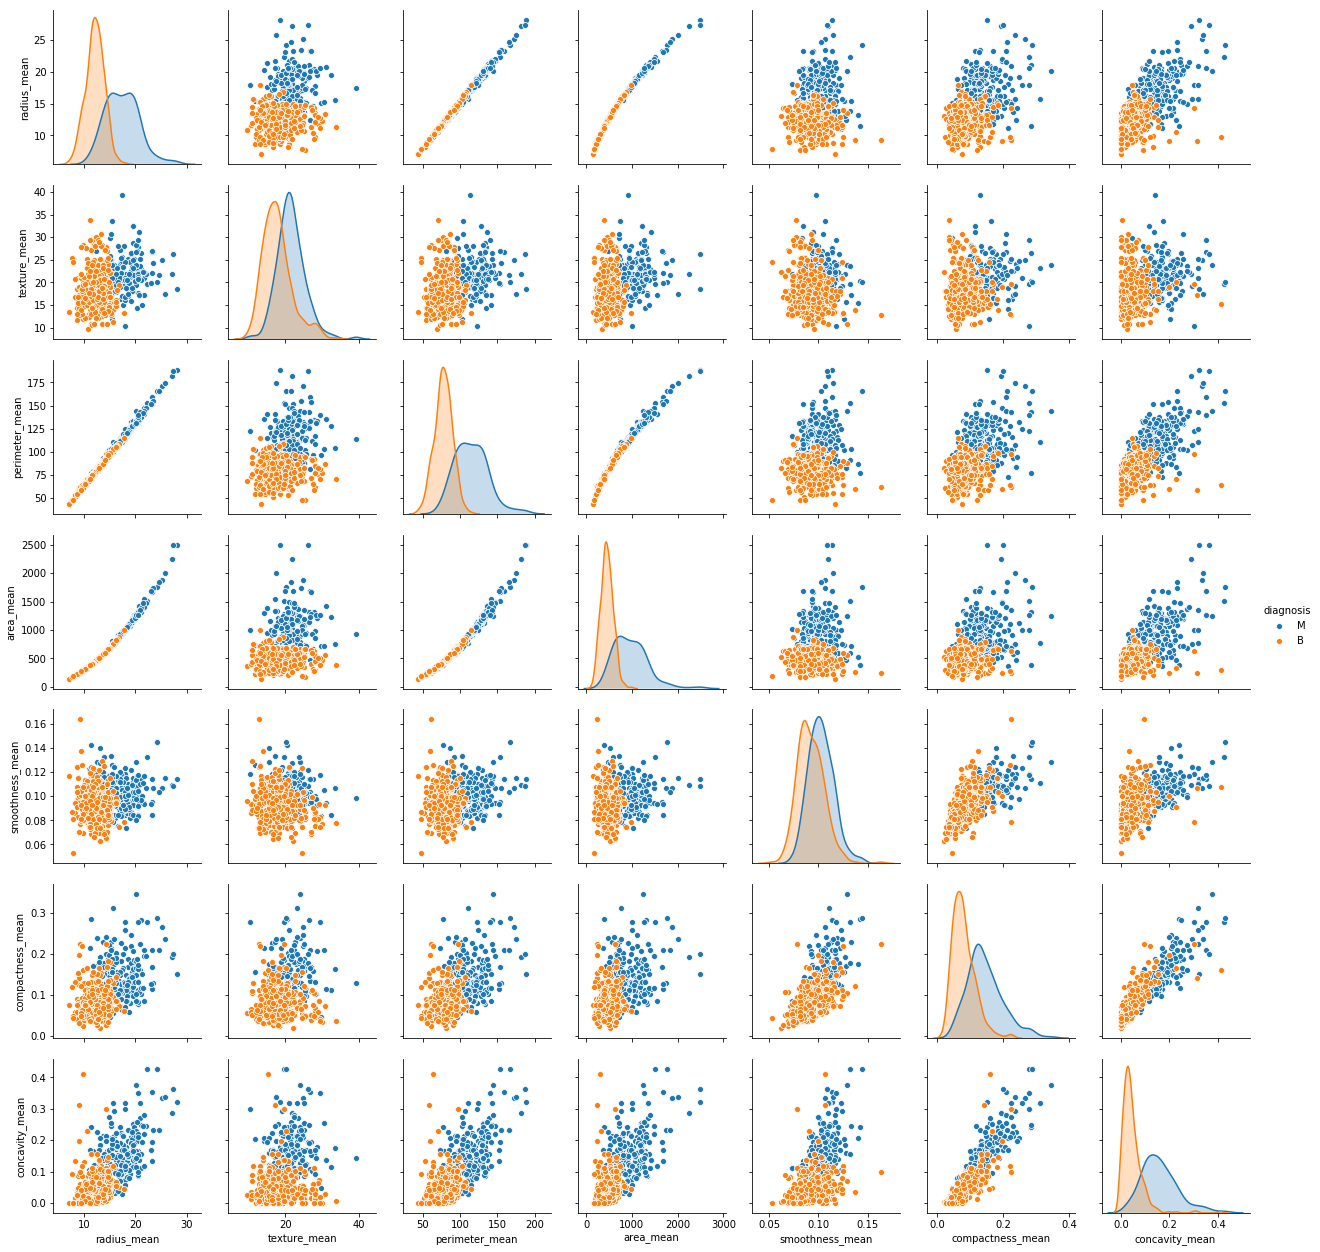

In [80]:
# pl.style.use(['ggplot'])
plt.figure(figsize=(15,15))
sns.pairplot(cancer.loc[:,'diagnosis':'concavity_mean'],hue='diagnosis')

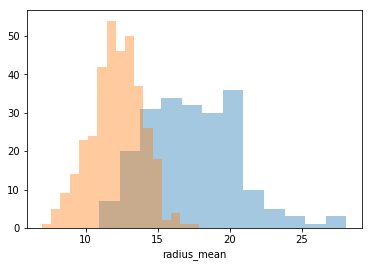

In [25]:
%matplotlib inline
sns.distplot(M['radius_mean'],kde=False)
sns.distplot(B['radius_mean'],kde=False)

Text(0.5, 1.0, 'M')

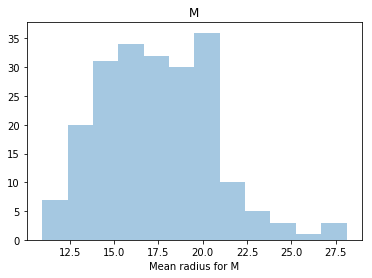

In [26]:
sns.distplot(M['radius_mean'],kde=False)
plt.xlabel('Mean radius for M')
plt.title('M')

Text(0.5, 1.0, 'B')

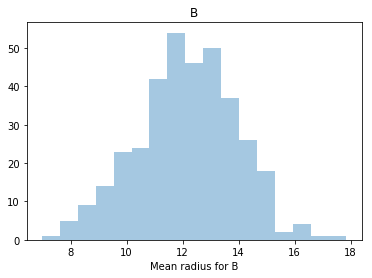

In [27]:
sns.distplot(B['radius_mean'],kde=False)
plt.xlabel('Mean radius for B')
plt.title('B')

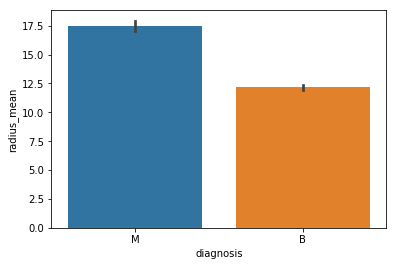

In [19]:
sns.barplot(y='radius_mean',x='diagnosis',data=cancer)

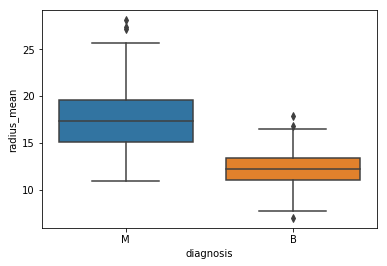

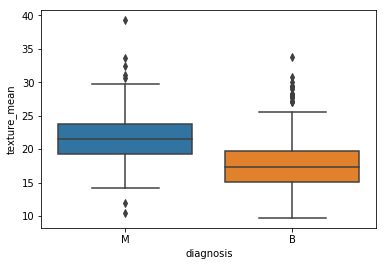

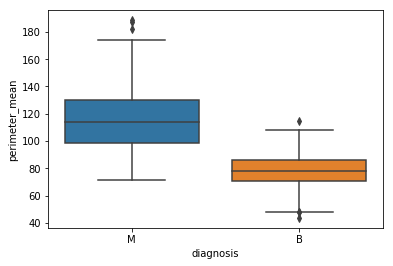

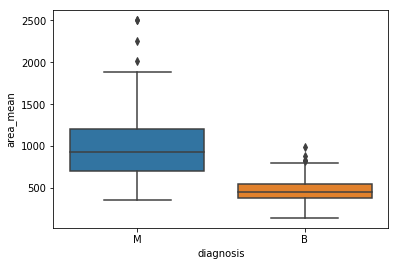

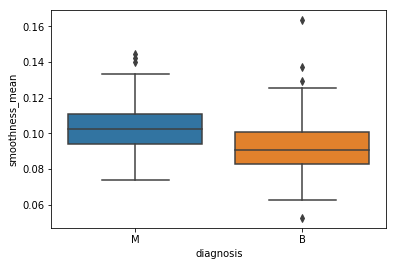

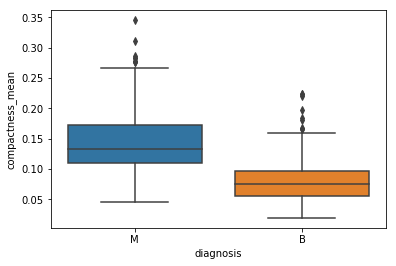

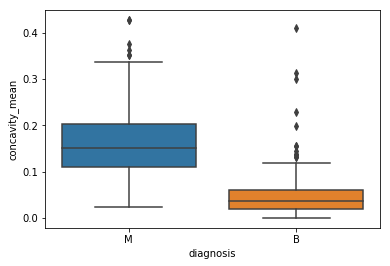

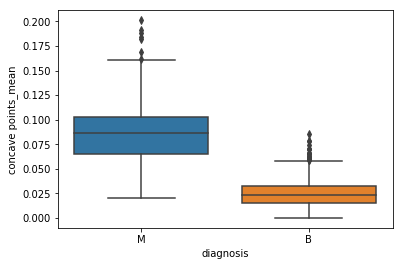

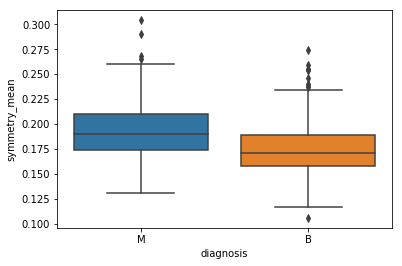

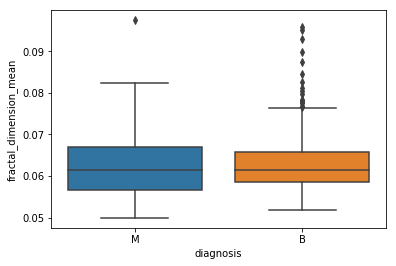

In [28]:
for i in cancer.iloc[:,2:12]:
    plt.subplots()
    sns.boxplot(data=cancer,x='diagnosis',y=i)

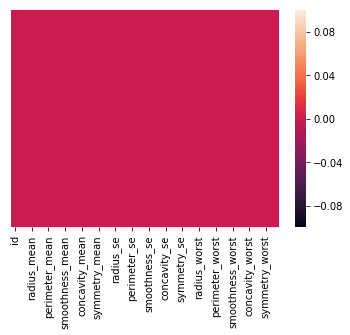

In [29]:
sns.heatmap(cancer.isnull(),yticklabels=False)

In [30]:
X.iloc[:,:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243


In [31]:
#2 sample t test using library
import scipy.stats as stats
stats.ttest_ind(M['radius_mean'],B['radius_mean'])

Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

In [32]:
# 2 sample t test manual
import statistics
m_avg = M['radius_mean'].mean()
b_avg = B['radius_mean'].mean()
m_se = statistics.stdev(M['radius_mean'])
b_se = statistics.stdev(B['radius_mean'])
m_ss = len(M)
b_ss = len(B)
print(m_ss,b_ss)
import math
EST = m_avg-b_avg
n2 = (((m_ss-1)*m_se*m_se)+((b_ss-1)*b_se*b_se))/(m_ss+b_ss-2)*((1/m_ss)+(1/b_ss))
n = math.sqrt(n2)
t = EST/n
print(t)

212 357
25.43582161005706


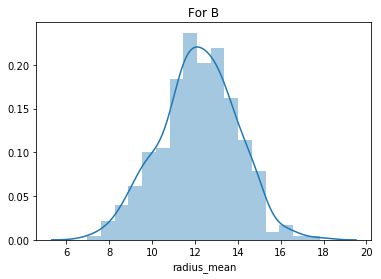

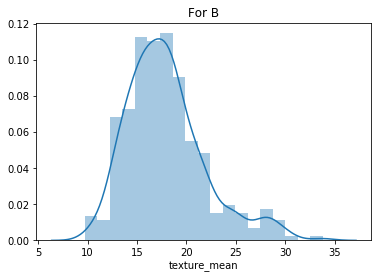

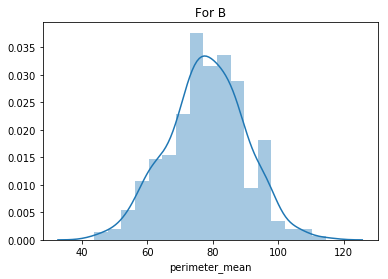

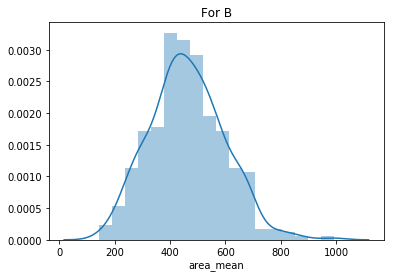

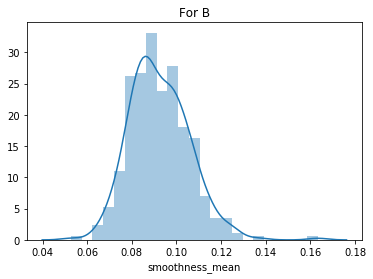

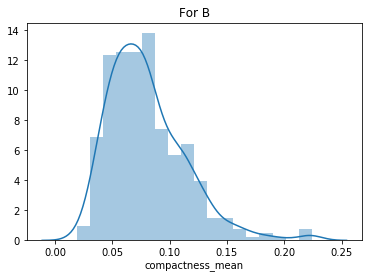

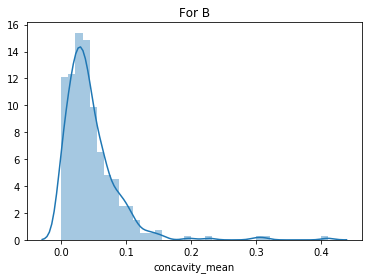

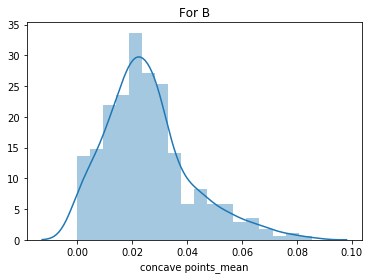

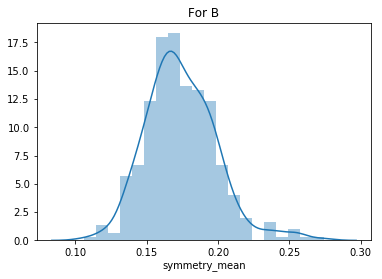

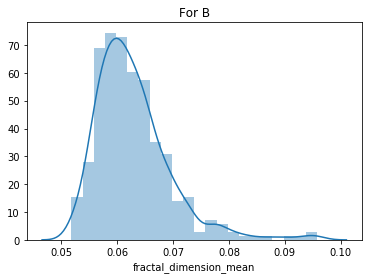

In [34]:
for i in cancer.iloc[:,2:12].columns:
    plt.subplots()
    sns.distplot(B[i])
    plt.title('For B')

Text(0.5, 1.0, 'B')

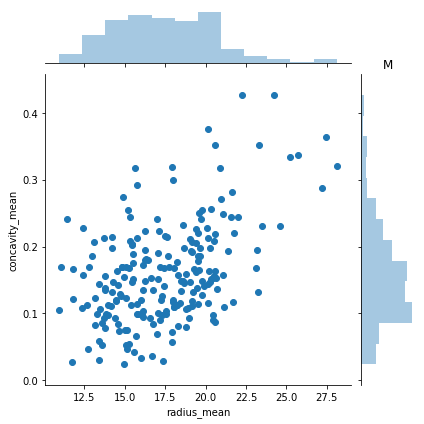

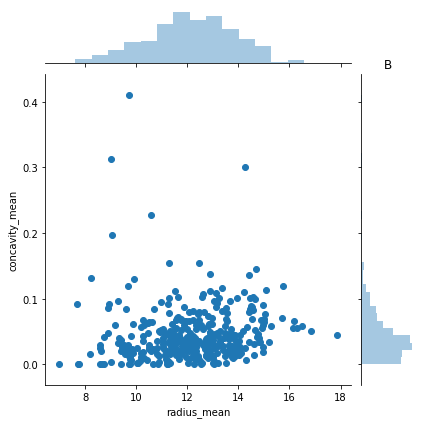

In [37]:
sns.jointplot(x='radius_mean',y='concavity_mean',data=M)
plt.title('M')
sns.jointplot(x='radius_mean',y='concavity_mean',data=B)
plt.title('B')

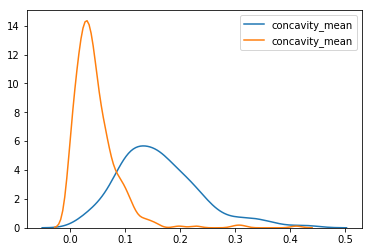

In [41]:
sns.kdeplot(M['concavity_mean'])
sns.kdeplot(B['concavity_mean'])

In [48]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc

In [49]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [59]:
model = LR()

In [68]:
X_train.drop('Unnamed: 32',axis=1,inplace=True)

C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
model.fit(X_train,y_train)

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
X_test.drop('Unnamed: 32',axis=1,inplace=True)

C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
pred = model.predict(X_test)

In [73]:
confusion = cm(pred,y_test)
confusion

array([[64,  1],
       [ 2, 47]], dtype=int64)

In [74]:
accuracy = acc(pred,y_test)
accuracy

0.9736842105263158

In [58]:
#With Only Mean Parameters

In [75]:
model1 = LR()

In [76]:
model1.fit(X_train.iloc[:,:10],y_train)

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
pred1 = model1.predict(X_test.iloc[:,:10])

In [78]:
confusion1 = cm(pred1,y_test)
confusion1

array([[63,  5],
       [ 3, 43]], dtype=int64)

In [81]:
accuracy1 = acc(pred1,y_test)
accuracy1

0.9298245614035088

In [94]:
cancer.groupby('diagnosis').get_group('B')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,0.2699,0.7886,2.0580,23.560,0.008462,0.014600,0.023870,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,0.1852,0.7477,1.3830,14.670,0.004097,0.018980,0.016980,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,0.2773,0.9768,1.9090,15.700,0.009606,0.014320,0.019850,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,0.1839,2.3420,1.1700,14.160,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,0.1563,0.9567,1.0940,8.205,0.008968,0.016460,0.015880,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409
48,857155,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,0.2636,0.7294,1.8480,19.870,0.005488,0.014270,0.023220,0.005660,0.01428,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301
49,857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,0.2338,1.3530,1.7350,20.200,0.004455,0.013820,0.020950,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917
50,857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,0.4062,1.2100,2.6350,28.470,0.005857,0.009758,0.011680,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563
51,857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,0.1872,0.9234,1.4490,14.550,0.004477,0.011770,0.010790,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025
52,857374,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,0.2273,0.6329,1.5200,17.470,0.007210,0.008380,0.013110,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408
